In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# -------------------------------
# Generate synthetic data
# -------------------------------
X = np.linspace(0, 10, 200).reshape(-1,1).astype(np.float32)
y = 7 * X + 5 + np.random.randn(*X.shape) * 2


In [3]:

# -------------------------------
# Learning rate scheduler
# -------------------------------
def scheduler(epoch, lr):
    if epoch % 20 == 0 and epoch:
        return lr * 0.5
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [4]:
# -------------------------------
# Build model (clean input)
# -------------------------------
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])


2026-02-08 23:45:58.447650: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2026-02-08 23:45:58.447717: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2026-02-08 23:45:58.447734: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2026-02-08 23:45:58.447780: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-08 23:45:58.447809: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [5]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mse')

In [6]:
# -------------------------------
# Train model
# -------------------------------
history = model.fit(X, y, epochs=100, callbacks=[lr_callback], verbose=0)


2026-02-08 23:46:32.164481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


In [7]:
# -------------------------------
# Predict
# -------------------------------
preds = model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


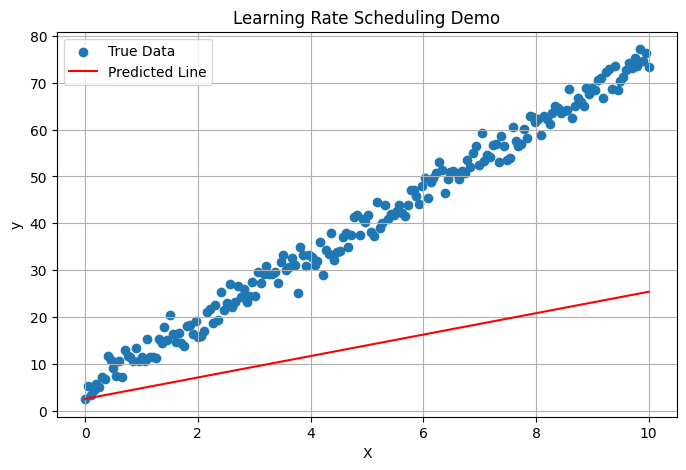

In [8]:

# -------------------------------
# Plot predictions
# -------------------------------
plt.figure(figsize=(8,5))
plt.scatter(X, y, label="True Data")
plt.plot(X, preds, color='red', label="Predicted Line")
plt.title("Learning Rate Scheduling Demo")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

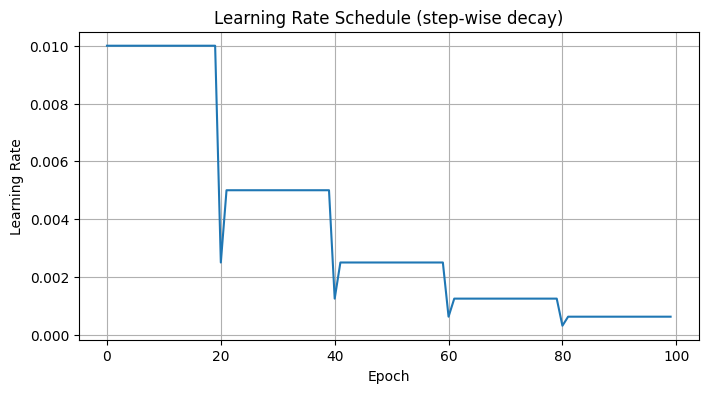

In [9]:
# -------------------------------
# Plot learning rate schedule
# -------------------------------
lrs = [scheduler(e, 0.01 * (0.5 ** (e // 20))) for e in range(100)]
plt.figure(figsize=(8,4))
plt.plot(lrs)
plt.title("Learning Rate Schedule (step-wise decay)")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.grid(True)
plt.show()
